  # LAB 2 : END-TO-END MACHINE LEARNING PROJECT  " FACE DETECTION APPLICATION”


#Partie 1 


##Feature Engineering

**positive samples:**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images

In [ ]:
#Q1
print(positive_patches.shape)

(13233, 62, 47)


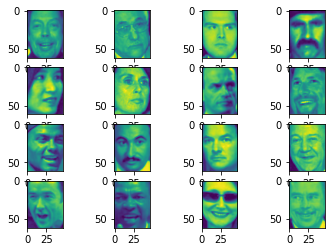

In [ ]:
#Q2
for i in range (16):
  plt.subplot(4,4,i+1)
  plt.imshow(positive_patches[i,:,:])

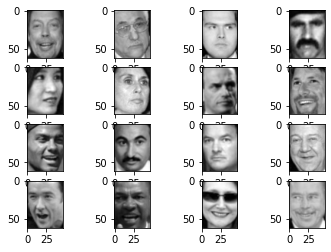

In [ ]:
#Q3 HOG 

for i in range (16):
  plt.subplot(4,4,i+1)
  plt.imshow(positive_patches[i,:,:], cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys


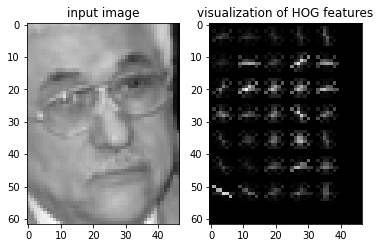

In [ ]:
#Q3 HOG 

import matplotlib.pyplot as plt
from skimage import color, feature
import skimage.data
sample=positive_patches[1,:,:]
img = color.rgb2gray(sample) #choose a sample here!
hog_vec, hog_vis = feature.hog(img, visualize=True)
plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.title('input image')
plt.subplot(1,2,2),plt.imshow(hog_vis ,cmap='gray'),plt.title('visualization of HOG features')
plt.show()

dim = hog_vec.shape[0]
 

negative samples

In [ ]:
from skimage import data, transform
import numpy as np 
from sklearn.feature_extraction.image import PatchExtractor
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
 extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
 extractor = PatchExtractor(patch_size=extracted_patch_size,
 max_patches=N, random_state=0)
 patches = extractor.transform(img[np.newaxis])
 if scale != 1:
  patches = np.array([transform.resize(patch, patch_size)for patch in patches])
 return patches
negative_patches = np.vstack([extract_patches(im, 1000, scale)
 for im in images for scale in [0.5, 1.0, 2.0]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


In [ ]:
#Q4
print(negative_patches.shape)

(30000, 62, 47)


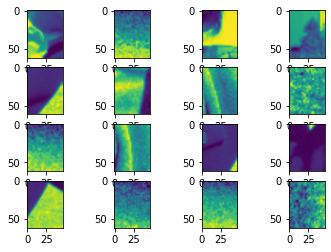

In [ ]:
#Q5
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(negative_patches[i,:,:])
plt.show()

In [ ]:
#Q6
N = min(positive_patches.shape[0],negative_patches.shape[0])
X = np.zeros((2*N, dim)) #data
Y = np.concatenate((np.ones((N,1)), np.zeros((N,1))), axis=0) 

for i in range (N):
  img= positive_patches[i,:,:]
  img_gray = color.rgb2gray(img)
  hog_vec = feature.hog(img_gray)
  print(hog_vec.shape)
  X[i,:]= hog_vec.reshape((1,dim))
  

#Q7
for i in range (N):
  img= negative_patches[i,:,:]
  img_gray = color.rgb2gray(img)
  hog_vec = feature.hog(img_gray)
  print(hog_vec.shape)
  X[i+N,:]= hog_vec.reshape((1,dim))



Y = np.concatenate((np.ones((N,1)), np.zeros((N,1))), axis=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1

In [ ]:
print(X.shape)
print(Y.shape)

(26466, 1215)
(26466, 1)


#Partie 2
# Binary Classification using Scikit-Learn


In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# View the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21172, 1215), (5294, 1215), (21172, 1), (5294, 1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
models = [
 { "estimater": KNeighborsClassifier(),
 "params": {
 "n_neighbors": [5],
 "weights": ['uniform'],
 "leaf_size": [25],
 "p": [1],
 }
 },
 { "estimater": DecisionTreeClassifier(),
 "params": {
 "criterion": ['gini'],
 "splitter": ['best'],
 "max_depth": [None],
 "max_features": [None],
 "random_state": [42]
 }
 },
 
 { "estimater": svm.SVC(),
 "params": {
     'C': [0.1], 'gamma': [1], 'kernel': ['rbf']
 }
 },
 { "estimater": RandomForestClassifier(),
 "params": {
 "criterion": ['gini'],
 "bootstrap": [True],
 "max_depth": [85],
 "max_features": ['sqrt'],
 "n_estimators": [60],
 "random_state": [42]
 }
 }
]
column_names = ["KNeighbors", "DecisionTree", "SVM", "RF"]
entries = []
max_acc = 0
best_model = None
for model in models:
 print(model["estimater"])
 # Create model
 clf = model["estimater"]
 # Instantiate the grid search model
 grid_search = GridSearchCV(estimator = clf, param_grid = model["params"],cv = 5)
 
 # Fit the model
 grid_search.fit(X_train, y_train)
 # Make predictions on the test set compute accuracy metric
 predicted = grid_search.predict(X_test)
 acc = accuracy_score(predicted, y_test)
 entries.append(acc)
 print(grid_search.best_params_)
 # Get the best model with the highest accuracy
 if acc > max_acc:
   max_acc = acc
   best_model = grid_search


KNeighborsClassifier()


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

{'leaf_size': 25, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
DecisionTreeClassifier()
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 42, 'splitter': 'best'}
SVC()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
RandomForestClassifier()


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 85, 'max_features': 'sqrt', 'n_estimators': 60, 'random_state': 42}


      Estimator  Accuracy
0    KNeighbors  0.997922
1  DecisionTree  0.936154
2           SVM  0.533245
3            RF  0.989611


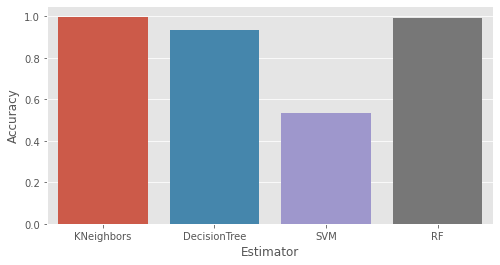

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.DataFrame({"Estimator": column_names, "Accuracy": entries})
plt.figure(figsize=(8, 4))
sns.barplot(x='Estimator', y='Accuracy', data=df)
print(df)


 **l'algorithme KNeighbors** et **"RF"**est le plus performant,
aprés optimisation des paramètres dans chaque algorithme pour savoir lequel qui a la meilleure performance.

import joblib

joblib.dump(best_model, “model.sav”)

In [ ]:
import joblib
joblib.dump(best_model, "model.sav")

['model.sav']

#3. Evaluating the Best Face Detector

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation comparison on y_true labels vs. y_pred labels
  on a classification.
  """
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds, average='micro')
  recall = recall_score(y_true, y_preds, average='micro')
  f1 = f1_score(y_true, y_preds, average='micro')
  metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
  
  return metric_dict

#Q9

y_pred=best_model.predict(X_test)
dict_pf=evaluate_preds(y_true, y_preds)
print(dict_pf)




##4. Finding Faces in a New Image


(-0.5, 139.5, 159.5, -0.5)

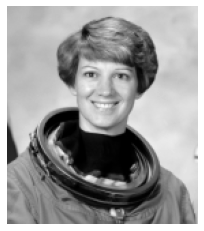

In [ ]:
#Q10
import skimage.data

test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off')

In [ ]:
#Q11
def sliding_window(img, patch_size=positive_patches[0].shape,
 istep=2, jstep=2, scale=1.0):
 Ni, Nj = (int(scale * s) for s in patch_size)
 for i in range(0, img.shape[0] - Ni, istep):
  for j in range(0, img.shape[1] - Ni, jstep):
    patch = img[i:i + Ni, j:j + Nj]
    if scale != 1:
      patch = transform.resize(patch, patch_size)
    yield (i, j), patch
 
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
print(f"Patches Hog shape: {patches_hog.shape}")

Patches Hog shape: (1911, 1215)


In [ ]:
#Q12
labels = best_model.predict(patches_hog)
print(f"labels: {labels.sum()}")

labels: 141.0


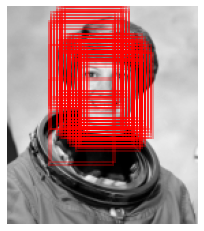

In [ ]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

#interface 

In [ ]:
!pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
